[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]()

#1. Import modules and load dataset

In [98]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
from datasets import load_dataset

dataset = load_dataset("leinms/flickr30k-qwen3vl-baseline-evaluation-by-gpt-4o-2024-08-06")

In [100]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'alt_text', 'baseline_answ', 'semantic_similarity', 'object_coverage', 'hallucination_score', 'completeness', 'instruction_following', 'fluency', 'final_score'],
        num_rows: 1000
    })
})

In [101]:
import pandas as pd
df = dataset['test'].to_pandas()

In [102]:
df.head(3)

,image,alt_text,baseline_answ,semantic_similarity,object_coverage,hallucination_score,completeness,instruction_following,fluency,final_score
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Person wearing a colorful hat and glasses.,A man wearing a distinctive orange crocheted h...,7,8,10,7,8,10,83
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,A dog running on green grass near a white fence.,A black and white Boston Terrier runs joyfully...,8,9,8,9,7,9,83
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,A child and a person practicing martial arts o...,A martial arts instructor demonstrates a techn...,7,8,7,8,9,10,81


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   image                  1000 non-null   object
 1   alt_text               1000 non-null   object
 2   baseline_answ          1000 non-null   object
 3   semantic_similarity    1000 non-null   int64 
 4   object_coverage        1000 non-null   int64 
 5   hallucination_score    1000 non-null   int64 
 6   completeness           1000 non-null   int64 
 7   instruction_following  1000 non-null   int64 
 8   fluency                1000 non-null   int64 
 9   final_score            1000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 78.3+ KB


# 2. Base statistics

# Model Evaluation Metrics Summary

This summary provides a brief description of the performance metrics for the baseline **Qwen3-VL-2b** model, based on the provided analysis.

## Detailed Metric Descriptions

* **Semantic Similarity ($\approx 7/10$):** The model generally captures the meaning, but it sometimes alters the action or misses specific details.
* **Object Coverage ($\approx 8.55$):** The model excels at identifying objects, showing very high object recognition but a weaker ability to link them into cohesive actions.
* **Hallucination Score ($\approx 7.87$):** Hallucinations occur in about 20–25% of cases, typically manifesting as extra actions or attributes rather than entirely new objects.
* **Completeness ($\approx 7.6$):** Completeness is medium; the model describes the scene well but frequently loses crucial details, especially in photos with two or more main subjects.
* **Instruction Following ($\approx 7.4$):** The model's format discipline is weak, often resulting in captions that are slightly too long, contain unnecessary words, or add subjective interpretation.
* **Fluency ($\approx 9.2$):** The language fluency is nearly perfect, demonstrating that the model's errors stem from image understanding, not linguistic quality.
* **Final Score ($\approx 78$):** A final score of 78 indicates a strong, confident baseline performance, positioning the model as a respectable average performer but not state-of-the-art.

---

## Conclusion

The model is a respectable baseline captioner, characterized by excellent object recognition but moderate performance in semantic accuracy, completeness, and adherence to specific formatting instructions.

In [104]:
df.describe()

,semantic_similarity,object_coverage,hallucination_score,completeness,instruction_following,fluency,final_score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.001000,8.55300,7.869000,7.627000,7.422000,9.231000,78.625000
std,1.345663,1.22666,1.435235,1.378322,1.434564,0.661874,11.195522
min,2.000000,3.00000,2.000000,3.000000,2.000000,6.000000,30.000000
25%,6.000000,8.00000,7.000000,7.000000,6.750000,9.000000,72.000000
50%,7.000000,9.00000,8.000000,8.000000,8.000000,9.000000,80.000000
75%,8.000000,9.00000,9.000000,9.000000,9.000000,10.000000,87.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,100.000000


## 2.1 Only mean values

In [105]:
metric_cols = [
    "semantic_similarity",
    "object_coverage",
    "hallucination_score",
    "completeness",
    "instruction_following",
    "fluency",
    "final_score",
]

print("\n=== Mean values of metrics ===")
print(df[metric_cols].mean())


=== Mean values of metrics ===
semantic_similarity       7.001
object_coverage           8.553
hallucination_score       7.869
completeness              7.627
instruction_following     7.422
fluency                   9.231
final_score              78.625
dtype: float64


# 3. Histograms

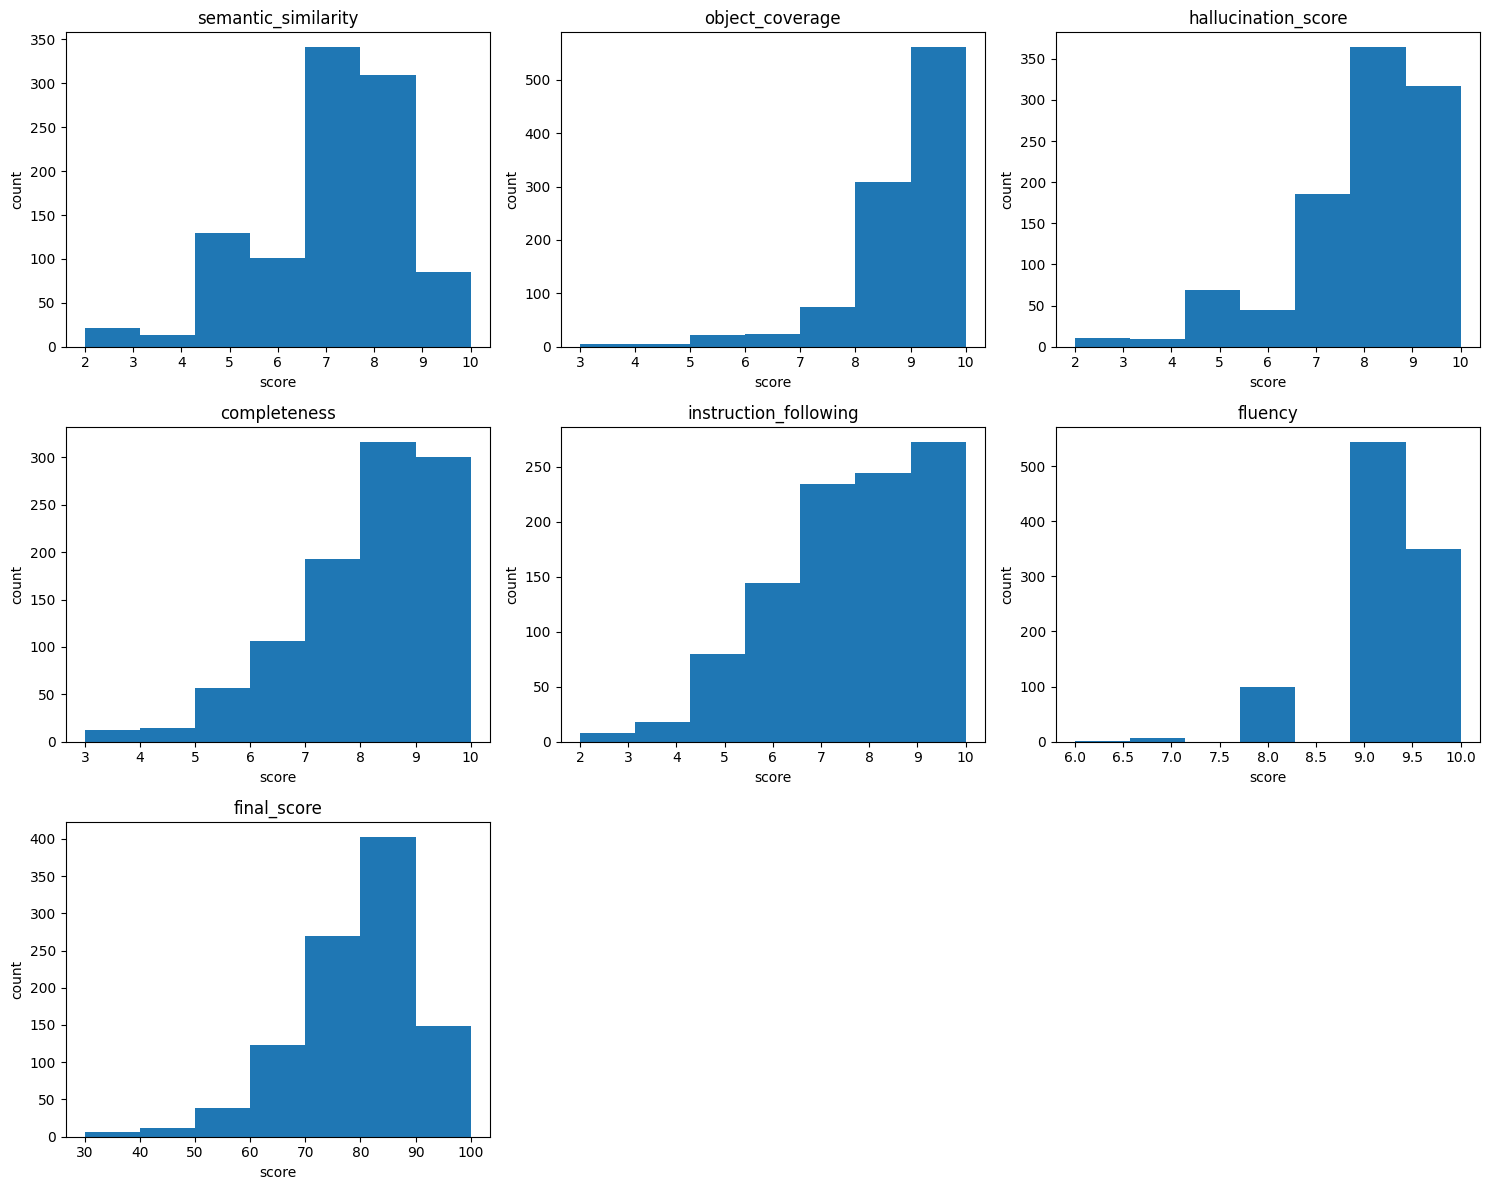

In [106]:
def plot_histograms(df, cols, bins=7):
    n_cols = 3
    n_rows = int(np.ceil(len(cols) / n_cols))
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.hist(df[col], bins=bins)
        plt.title(col)
        plt.xlabel("score")
        plt.ylabel("count")

    plt.tight_layout()
    plt.show()

plot_histograms(df, metric_cols)

# 4. Heatmap


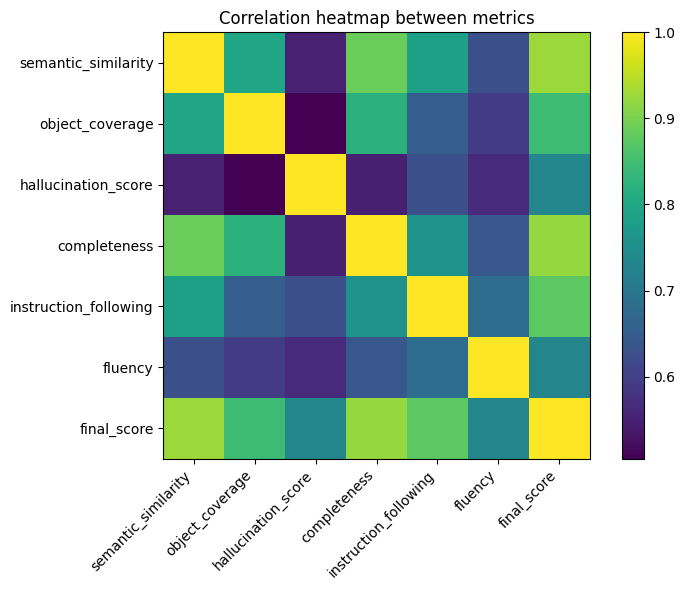

In [107]:
corr = df[metric_cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(metric_cols)), metric_cols, rotation=45, ha="right")
plt.yticks(range(len(metric_cols)), metric_cols)
plt.colorbar()
plt.title("Correlation heatmap between metrics")
plt.tight_layout()
plt.show()

# 5. Top-K / Bottom-K examples by metrics

In [108]:
from PIL import Image
from io import BytesIO

def get_image_from_bytes(image_data): # Переименуем для ясности
    """Возвращает объект PIL.Image из словаря байтов."""
    if not isinstance(image_data, dict) or 'bytes' not in image_data:
        return None
    try:
        image_stream = BytesIO(image_data['bytes'])
        img = Image.open(image_stream)
        return img # <--- КЛЮЧ: Возвращаем объект Image
    except Exception:
        return None

In [109]:
def show_examples(df, sort_by, ascending=True, k=5):
    """
    Печатает top-K или bottom-K примеров по указанной метрике.
    ascending=True  → самые низкие значения
    ascending=False → самые высокие
    """
    subset = df.sort_values(by=sort_by, ascending=ascending).head(k)
    direction = "LOWEST" if ascending else "HIGHEST"
    print(f"\n=== {direction} {k} examples by {sort_by} ===\n")

    cols_to_show = [
        "alt_text",
        "baseline_answ",
        "semantic_similarity",
        "object_coverage",
        "hallucination_score",
        "completeness",
        "instruction_following",
        "fluency",
        "final_score",
    ]

    for idx, row in subset.iterrows():
        print(f"[index={idx}]")
        # print(row["image"])
        img = get_image_from_bytes(row["image"])
        display(img)
        print("GOLD :", row["alt_text"])
        print("MODEL:", row["baseline_answ"])
        for c in cols_to_show[2:]:
            print(f"  {c}: {row[c]}")
        print("-" * 80)
        # break

##5.1 The worst 3 results in the final score


=== LOWEST 3 examples by final_score ===

[index=764]


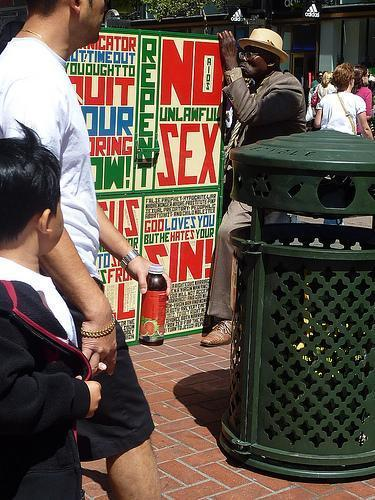

GOLD : People walking past a person holding a sign.
MODEL: A man in a hat and sunglasses stands next to a green trash can, holding a red bottle, while a large poster with bold red and green text reading "NO SEX" and "UNLAWFUL SEX" is displayed on the sidewalk.
  semantic_similarity: 2
  object_coverage: 5
  hallucination_score: 3
  completeness: 3
  instruction_following: 2
  fluency: 6
  final_score: 30
--------------------------------------------------------------------------------
[index=383]


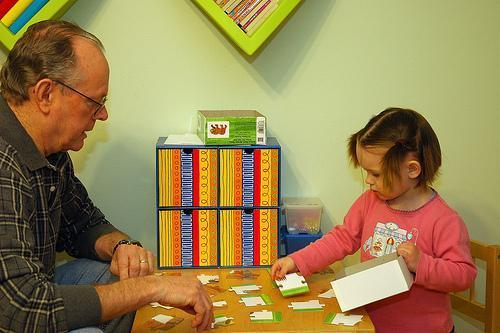

GOLD : A person and a child playing with puzzle pieces on a table.
MODEL: An elderly man and a young girl are playing a card game together at a wooden table in a brightly colored room.
  semantic_similarity: 3
  object_coverage: 5
  hallucination_score: 3
  completeness: 3
  instruction_following: 3
  fluency: 8
  final_score: 35
--------------------------------------------------------------------------------
[index=519]


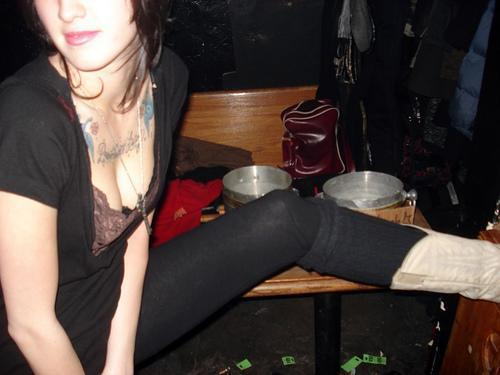

GOLD : Person sitting on a bench with some bags around.
MODEL: A woman with a tattoo on her chest sits on a wooden table with her legs crossed, wearing black leggings and a black shirt, in a dimly lit, possibly club-like setting.
  semantic_similarity: 2
  object_coverage: 3
  hallucination_score: 5
  completeness: 3
  instruction_following: 3
  fluency: 8
  final_score: 35
--------------------------------------------------------------------------------


In [110]:
show_examples(df, "final_score", ascending=True, k=3)

##5.2 The best 3 results in the final score


=== HIGHEST 3 examples by final_score ===

[index=410]


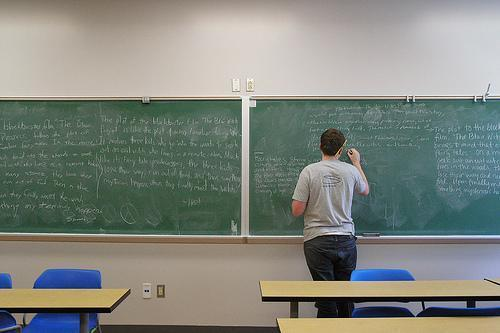

GOLD : Person writing on a large chalkboard in a classroom.
MODEL: A man stands in a classroom, writing on a large green chalkboard.
  semantic_similarity: 10
  object_coverage: 10
  hallucination_score: 10
  completeness: 10
  instruction_following: 10
  fluency: 10
  final_score: 100
--------------------------------------------------------------------------------
[index=30]


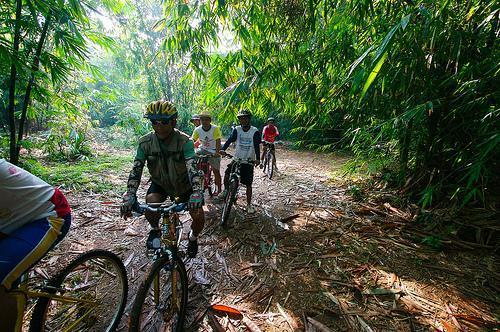

GOLD : People riding bicycles on a forest path surrounded by bamboo.
MODEL: A group of cyclists rides along a narrow, leaf-covered path through a dense bamboo forest.
  semantic_similarity: 10
  object_coverage: 10
  hallucination_score: 10
  completeness: 10
  instruction_following: 10
  fluency: 10
  final_score: 100
--------------------------------------------------------------------------------
[index=731]


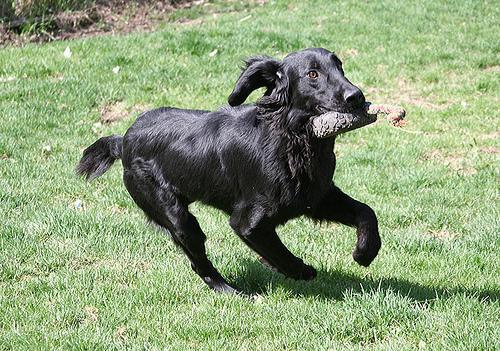

GOLD : A black dog running on grass with a stick in its mouth.
MODEL: A black dog is running across a grassy field, holding a stick in its mouth.
  semantic_similarity: 10
  object_coverage: 10
  hallucination_score: 10
  completeness: 10
  instruction_following: 10
  fluency: 10
  final_score: 100
--------------------------------------------------------------------------------


In [111]:
show_examples(df, "final_score", ascending=False, k=3)

#6 Captions length analysis

In [112]:
df["alt_len"] = df["alt_text"].astype(str).str.split().str.len()
df["baseline_len"] = df["baseline_answ"].astype(str).str.split().str.len()

print("\n=== Captions length staistics ===")
print(df[["alt_len", "baseline_len"]].describe())


=== Captions length staistics ===
          alt_len  baseline_len
count  1000.00000   1000.000000
mean      8.91300     23.829000
std       1.31269      5.829043
min       4.00000     10.000000
25%       8.00000     20.000000
50%       9.00000     23.500000
75%      10.00000     28.000000
max      13.00000     53.000000
